# Exploratory Data Analysis

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set()

## Importing data using Pandas

In [2]:
df_deli = pd.read_csv('Data/2.Data Cleaning/delivery.csv', index_col='timestamp')
df_cons = pd.read_csv('Data/2.Data Cleaning/consumption.csv', index_col='timestamp')
df_info = pd.read_csv('Data/2.Data Cleaning/houses_info.csv', index_col='ID-nummer')

df_deli.index = pd.to_datetime(df_deli.index)
df_cons.index = pd.to_datetime(df_cons.index)

display(df_deli.head())
display(df_cons.head())
display(df_info.head())

,H01,H02,H03,H04,H06,H07,H08,H09,H12,H13,...,H22,H23,H24,H25,H26,H28,H29,H31,H32,H33
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-07-11 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-11 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-11 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-11 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-11 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,H01,H02,H03,H04,H06,H07,H08,H09,H12,H13,...,H22,H23,H24,H25,H26,H28,H29,H31,H32,H33
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-07-11 00:15:00,0.038,0.039,0.044,0.024,0.039,0.025,0.006,0.294,0.137,0.058,...,0.024,0.115,0.053,0.018,0.076,0.036,0.014,0.416,0.023,0.053
2017-07-11 00:30:00,0.018,0.027,0.034,0.024,0.051,0.017,0.007,0.165,0.402,0.060,...,0.013,0.101,0.049,0.019,0.083,0.027,0.026,0.170,0.031,0.029
2017-07-11 00:45:00,0.028,0.014,0.026,0.018,0.076,0.018,0.006,0.107,0.019,0.363,...,0.025,0.108,0.043,0.018,0.292,0.018,0.011,0.075,0.025,0.028
2017-07-11 01:00:00,0.026,0.014,0.474,0.021,0.080,0.016,0.006,0.105,0.024,0.049,...,0.024,0.090,0.058,0.019,0.049,0.022,0.026,0.099,0.024,0.041
2017-07-11 01:15:00,0.018,0.014,0.084,0.117,0.438,0.023,0.006,0.103,0.013,0.198,...,0.014,0.246,0.045,0.018,0.048,0.015,0.017,0.054,0.025,0.032


,concept,PV-aantal,personen
ID-nummer,,,
H01,E,17,4
H02,E,14,2
H03,WP,9,4
H04,WP,11,1
H06,E,14,4


## Data Preparation

Once we have the datasets cleaned, we are going to add new data from a different source in order to enrich our datasets. We will add the following data:
* _**KNMI:**_ We will add weather data from the _Koninklijk Nederlands Meteorologisch Instituut_.
* **_Dummy_ variables:** We will create some dummy variables.

### _KNMI: Koninklijk Nederlands Meteorologisch Instituut_

In [3]:
df_weather = pd.read_csv('../dwelling2/Data/KNMI_Voorschoten_20170711_20190601.csv', index_col='Date_and_time')
df_weather.index = pd.to_datetime(df_weather.index)

# Filling NaN values
df_weather.loc[(df_weather['N'] == '     '), 'N'] = np.nan
df_weather = df_weather.fillna(method='ffill', axis=1)
df_weather = df_weather.apply(pd.to_numeric)

df_weather.head()

,T,SQ,Q,N
Date_and_time,,,,
2017-07-11 01:00:00,16.6,0,0,8.0
2017-07-11 02:00:00,16.7,0,0,6.0
2017-07-11 03:00:00,16.9,0,0,7.0
2017-07-11 04:00:00,16.7,0,2,7.0
2017-07-11 05:00:00,17.0,2,13,6.0


This dataset contains the following data:
* _**T:**_ Temperature (in 0.1 degrees Celsius) at 1.50 m height during the observation.
* _**SQ:**_ Duration of sunshine (in 0.1 hours) per hour, calculated from global radiation (-1 for <0.05 hours).
* _**Q:**_ Global radiation (in J / cm2) per hour.
* _**N:**_ Cloud cover index (coverage of the upper air), during the observation (9 = upper air invisible).

#### Cleaning KNMI
Before we add the KNMI data to our dataset, we will check if the data is already cleaned.

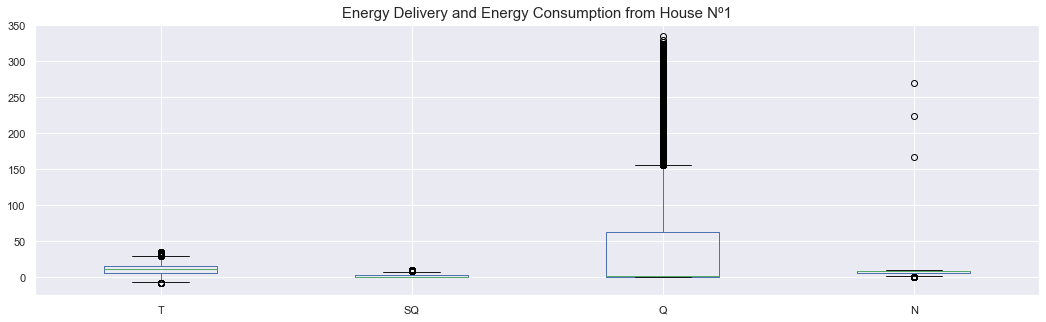

In [4]:
df_weather.plot.box(figsize=(18,5))
plt.title("Energy Delivery and Energy Consumption from House Nº1", fontsize=15)
plt.show()

As we can see, everything seems to be fine except the _cloud cover index_, which takes values from 0 to 9. We will have to replace those values with the correct ones.

In [5]:
df_weather.loc[(df_weather['N'] > 10), 'N'] = np.nan
df_weather.fillna(method='ffill', inplace=True)

# Exporting dataset
df_weather.to_csv('Data/3.Data Preparation/weather.csv')

#### Adding KNMI to our dataset

The data from the smart meter is measured every 15 minutes whereas the KNMI data is measured every hour.

If we join these datasets, we will have NaN values on the weather side, in order to fix that, we will apply a forward fill.

This means that we will apply the KNMI data from one hour to the four quarters of the smart meter.

In [6]:
df_deli = df_deli.join(df_weather)
df_deli.fillna(method='ffill', inplace=True)
df_deli.dropna(inplace=True)

df_cons = df_cons.join(df_weather)
df_cons.fillna(method='ffill', inplace=True)
df_cons.dropna(inplace=True)

In [7]:
display(df_deli.shape)
display(df_cons.shape)

(47706, 31)

(47706, 31)

### _Dummy variables_

We will also create the following dummy variables in our datasets:
* Hour
* Day of the week
* Day of the month
* Week of the month
* Month
* Season

In [8]:
from datetime import date, datetime

def get_season(year_day):
    spring = range(80, 172) # Corresponds to season 1
    summer = range(172, 264) # Corresponds to season 2
    fall = range(264, 355) # Corresponds to season 3
    # winter Corresponds to season 4

    if year_day in spring:
        season = 1
    elif year_day in summer:
        season = 2
    elif year_day in fall:
        season = 3
    else:
        season = 4
    return season

In [9]:
df_deli['hour'] = df_deli.index.hour
df_deli['day_of_week'] = df_deli.index.weekday
df_deli['day_of_month'] = df_deli.index.day
df_deli['week'] = df_deli.index.week
df_deli['month'] = df_deli.index.month
df_deli['season'] = [get_season(index.timetuple().tm_yday) for index in df_deli.index]

## Preparing dataset

Once we have added the weather data from KNMI, we will prepare the dataset to feed the models as explained below:
* We will compact the data by summing the energy production and consumption.
* We will create dummy variables.
* We will concatenate the data from one dwelling below each other, this will allow the model to compare the records from every dwelling.

### Compacting data

We will compact the dataset in three different ways:
* Hourly.
* Daily.
* Weekly.

#### Compacting data by hour

In [10]:
df_deli_hour = df_deli.groupby([df_deli.index.year, df_deli.index.month, df_deli.index.week, df_deli.index.day, df_deli.index.hour]).agg({
    'H01':'sum', 'H02':'sum', 'H03':'sum', 'H04':'sum', 'H06':'sum',
    'H07':'sum', 'H08':'sum', 'H09':'sum', 'H12':'sum', 'H13':'sum',
    'H15':'sum', 'H16':'sum', 'H17':'sum', 'H18':'sum', 'H19':'sum',
    'H20':'sum', 'H21':'sum', 'H22':'sum', 'H23':'sum', 'H24':'sum',
    'H25':'sum', 'H26':'sum', 'H28':'sum', 'H29':'sum', 'H31':'sum',
    'H32':'sum', 'H33':'sum',
    'T':'mean', 'SQ':'mean', 'Q':'mean', 'N':'mean',
    'hour': lambda x: x.value_counts().index[0],
    'day_of_week': lambda x: x.value_counts().index[0],
    'day_of_month': lambda x: x.value_counts().index[0],
    'week': lambda x: x.value_counts().index[0],
    'month': lambda x: x.value_counts().index[0],
    'season': lambda x: x.value_counts().index[0]
})
df_cons_hour = df_cons.groupby([df_cons.index.year, df_cons.index.month, df_cons.index.week, df_cons.index.day, df_deli.index.hour]).agg({
    'H01':'sum', 'H02':'sum', 'H03':'sum', 'H04':'sum', 'H06':'sum',
    'H07':'sum', 'H08':'sum', 'H09':'sum', 'H12':'sum', 'H13':'sum',
    'H15':'sum', 'H16':'sum', 'H17':'sum', 'H18':'sum', 'H19':'sum',
    'H20':'sum', 'H21':'sum', 'H22':'sum', 'H23':'sum', 'H24':'sum',
    'H25':'sum', 'H26':'sum', 'H28':'sum', 'H29':'sum', 'H31':'sum',
    'H32':'sum', 'H33':'sum',
    'T':'mean', 'SQ':'mean', 'Q':'mean', 'N':'mean'
})

#### Compacting data by day

In [11]:
df_deli_day = df_deli.groupby([df_deli.index.year, df_deli.index.month, df_deli.index.week, df_deli.index.day]).agg({
    'H01':'sum', 'H02':'sum', 'H03':'sum', 'H04':'sum', 'H06':'sum',
    'H07':'sum', 'H08':'sum', 'H09':'sum', 'H12':'sum', 'H13':'sum',
    'H15':'sum', 'H16':'sum', 'H17':'sum', 'H18':'sum', 'H19':'sum',
    'H20':'sum', 'H21':'sum', 'H22':'sum', 'H23':'sum', 'H24':'sum',
    'H25':'sum', 'H26':'sum', 'H28':'sum', 'H29':'sum', 'H31':'sum',
    'H32':'sum', 'H33':'sum',
    'T':'mean', 'SQ':'mean', 'Q':'mean', 'N':'mean',
    'day_of_week': lambda x: x.value_counts().index[0],
    'day_of_month': lambda x: x.value_counts().index[0],
    'week': lambda x: x.value_counts().index[0],
    'month': lambda x: x.value_counts().index[0],
    'season': lambda x: x.value_counts().index[0]
})
df_cons_day = df_cons.groupby([df_cons.index.year, df_cons.index.month, df_cons.index.week, df_cons.index.day]).agg({
    'H01':'sum', 'H02':'sum', 'H03':'sum', 'H04':'sum', 'H06':'sum',
    'H07':'sum', 'H08':'sum', 'H09':'sum', 'H12':'sum', 'H13':'sum',
    'H15':'sum', 'H16':'sum', 'H17':'sum', 'H18':'sum', 'H19':'sum',
    'H20':'sum', 'H21':'sum', 'H22':'sum', 'H23':'sum', 'H24':'sum',
    'H25':'sum', 'H26':'sum', 'H28':'sum', 'H29':'sum', 'H31':'sum',
    'H32':'sum', 'H33':'sum',
    'T':'mean', 'SQ':'mean', 'Q':'mean', 'N':'mean'
})

#### Compacting data by week

In [12]:
df_deli_week = df_deli.groupby([df_deli.index.year, df_deli.index.month, df_deli.index.week]).agg({
    'H01':'sum', 'H02':'sum', 'H03':'sum', 'H04':'sum', 'H06':'sum',
    'H07':'sum', 'H08':'sum', 'H09':'sum', 'H12':'sum', 'H13':'sum',
    'H15':'sum', 'H16':'sum', 'H17':'sum', 'H18':'sum', 'H19':'sum',
    'H20':'sum', 'H21':'sum', 'H22':'sum', 'H23':'sum', 'H24':'sum',
    'H25':'sum', 'H26':'sum', 'H28':'sum', 'H29':'sum', 'H31':'sum',
    'H32':'sum', 'H33':'sum',
    'T':'mean', 'SQ':'mean', 'Q':'mean', 'N':'mean',
    'week': lambda x: x.value_counts().index[0],
    'month': lambda x: x.value_counts().index[0],
    'season': lambda x: x.value_counts().index[0]
})
df_cons_week = df_cons.groupby([df_cons.index.year, df_cons.index.month, df_cons.index.week]).agg({
    'H01':'sum', 'H02':'sum', 'H03':'sum', 'H04':'sum', 'H06':'sum',
    'H07':'sum', 'H08':'sum', 'H09':'sum', 'H12':'sum', 'H13':'sum',
    'H15':'sum', 'H16':'sum', 'H17':'sum', 'H18':'sum', 'H19':'sum',
    'H20':'sum', 'H21':'sum', 'H22':'sum', 'H23':'sum', 'H24':'sum',
    'H25':'sum', 'H26':'sum', 'H28':'sum', 'H29':'sum', 'H31':'sum',
    'H32':'sum', 'H33':'sum',
    'T':'mean', 'SQ':'mean', 'Q':'mean', 'N':'mean'
})

### Concatenating data

We will place the data from one dwelling below the previous one.

In [13]:
for df_deli, df_cons, suffix in [[df_deli_hour, df_cons_hour, 'hourly'],
                                 [df_deli_day, df_cons_day, 'daily'],
                                 [df_deli_week, df_cons_week, 'weekly']]:
    # Setting different columns (delivery, consumption, houses_info, dummy_variables)
    df = pd.DataFrame(columns=['delivery','consumption',
                               'T', 'SQ', 'Q', 'N',
                               'hour','day_of_week','day_of_month','week','month', 'season',
                               'heating_sys', 'no_people', 'no_solar_panels'])

    num_houses_cols = 27 # Number of houses

    # Preparing the delivery and consumption arrays
    ar_deli = np.array([])
    ar_cons = np.array([])
    for col in range(num_houses_cols):
        ar_deli = np.append(ar_deli, df_deli.values[:, col])
        ar_cons = np.append(ar_cons, df_cons.values[:, col])

    # Preparing the dwelling information arrays
    ar_heatSystem = np.array([])
    ar_people = np.array([])
    ar_solar_panels = np.array([])
    for house in df_info.iterrows():
        ar_heatSystem = np.append(ar_heatSystem, ([df_info.loc[house[0], 'concept']] * df_deli.shape[0]))
        ar_people = np.append(ar_people, ([df_info.loc[house[0], 'personen']] * df_deli.shape[0]))
        ar_solar_panels = np.append(ar_solar_panels, ([df_info.loc[house[0], 'PV-aantal']] * df_deli.shape[0]))

    # Inserting the data to the dataframe
    df['delivery'] = pd.Series(ar_deli)
    df['consumption'] = pd.Series(ar_cons)

    df['T'] = df_deli['T'].values.tolist() * num_houses_cols
    df['SQ'] = df_deli['SQ'].values.tolist() * num_houses_cols
    df['Q'] = df_deli['Q'].values.tolist() * num_houses_cols
    df['N'] = df_deli['N'].values.tolist() * num_houses_cols

    if 'hour' in df_deli.columns:
        df['hour'] = df_deli['hour'].values.tolist() * num_houses_cols
    if 'day_of_week' in df_deli.columns:
        df['day_of_week'] = df_deli['day_of_week'].values.tolist() * num_houses_cols
    if 'day_of_month' in df_deli.columns:
        df['day_of_month'] = df_deli['day_of_month'].values.tolist() * num_houses_cols
        
    df['week'] = df_deli['week'].values.tolist() * num_houses_cols
    df['month'] = df_deli['month'].values.tolist() * num_houses_cols
    df['season'] = df_deli['season'].values.tolist() * num_houses_cols

    df['heating_sys'] = pd.Series(ar_heatSystem)
    df['no_people'] = pd.Series(ar_people)
    df['no_solar_panels'] = pd.Series(ar_solar_panels)

    # Replacing heating system type with numbers
    df.replace('E', 1, inplace=True)
    df.replace('WP', 2, inplace=True)
    df.replace('Zon', 3, inplace=True)
    
    # Deleting NaN columns
    df.dropna(how='all', axis=1, inplace=True)
    
    # Exporting dataframes
    df.to_csv('Data/3.Data Preparation/df_full_' + suffix + '.csv')

    display(df.head())
    display(df.shape)

,delivery,consumption,T,SQ,Q,N,hour,day_of_week,day_of_month,week,month,season,heating_sys,no_people,no_solar_panels
0,0.0,0.403,16.6,0.0,0.0,8.0,1,1,11,28,7,2,1,4.0,17.0
1,0.0,0.089,16.7,0.0,0.0,6.0,2,1,11,28,7,2,1,4.0,17.0
2,0.0,0.108,16.9,0.0,0.0,7.0,3,1,11,28,7,2,1,4.0,17.0
3,0.0,0.088,16.7,0.0,2.0,7.0,4,1,11,28,7,2,1,4.0,17.0
4,0.0,0.087,17.0,2.0,13.0,6.0,5,1,11,28,7,2,1,4.0,17.0


(352782, 15)

,delivery,consumption,T,SQ,Q,N,day_of_week,day_of_month,week,month,season,heating_sys,no_people,no_solar_panels
0,13.576,4.122,17.626087,1.304348,61.521739,7.478261,1,11,28,7,2,1,4.0,17.0
1,14.423,5.023,15.279167,2.583333,65.166667,5.541667,2,12,28,7,2,1,4.0,17.0
2,15.578,4.260,14.492553,2.904255,74.074468,6.042553,3,13,28,7,2,1,4.0,17.0
3,17.514,9.534,14.673118,3.053763,81.924731,5.215054,4,14,28,7,2,1,4.0,17.0
4,17.943,4.641,17.341667,2.166667,85.958333,7.750000,5,15,28,7,2,1,4.0,17.0


(17307, 14)

,delivery,consumption,T,SQ,Q,N,week,month,season,heating_sys,no_people,no_solar_panels
0,91.077,33.692,16.286219,2.022968,68.263251,6.673145,28,7,2,1,4.0,17.0
1,155.805,25.345,18.711940,3.743284,88.304478,5.444776,29,7,2,1,4.0,17.0
2,115.247,12.459,17.671036,2.386731,72.325243,7.173139,30,7,2,1,4.0,17.0
3,23.200,2.087,17.550000,3.958333,89.333333,6.958333,31,7,2,1,4.0,17.0
4,124.048,13.100,17.242957,2.928696,77.158261,5.899130,31,8,2,1,4.0,17.0


(3051, 12)

As we can see above, every record has the following data:
* Energy delivery and consumption from one specific dwelling.
* KNMI data.
* Dummy variables.

### Exporting the datasets

The datasets have been exported in the previous step, they are the following:
* Hourly dataset.
* Daily dataset.
* Weekly dataset.